# Capstone - Question 2

## Should The Department of Housing Preservation and Development of New York City focus on any particular set of Boroughs or Zip Code or Streets (where the complaints are severe) for the specific type of Complaints you identified in response to Question 1?

Prepare Notebook tasks<br>
<li> Load libraries

In [176]:
import types
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from botocore.client import Config
import ibm_boto3

<li>Specify credentials

In [177]:
#Dataframe manipulation library


def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_bf9442079d134648bf58e1a33c4d0949 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='<**REPLACE_WITH_YOUR_IBM_API_KEY_ID**>',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_bf9442079d134648bf58e1a33c4d0949.get_object(Bucket='edxcapstone-donotdelete-pr-esmvpgbhnmenoy',Key='nyc-311-dataset-parsed.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


<li> Read 311 data

In [178]:
df_311 = pd.read_csv(body)
df_311.head()

,Unnamed: 0,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,0,2019-03-23T19:28:55.000,42034156,HEAT/HOT WATER,10032.0,835 RIVERSIDE DRIVE,RIVERSIDE DRIVE,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.836079,-73.946179,2019-03-27T08:17:34.000,RESIDENTIAL BUILDING,Closed
1,1,2019-03-23T17:05:17.000,42034212,UNSANITARY CONDITION,11225.0,348 MAPLE STREET,MAPLE STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.660905,-73.949222,2019-03-27T07:51:44.000,RESIDENTIAL BUILDING,Closed
2,2,2019-03-23T17:25:14.000,42034245,WATER LEAK,10460.0,783 GROTE STREET,GROTE STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.850269,-73.882685,2019-03-28T14:05:19.000,RESIDENTIAL BUILDING,Closed
3,3,2019-03-23T10:27:32.000,42034339,ELECTRIC,10468.0,2800 JEROME AVENUE,JEROME AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.870341,-73.894718,2019-04-08T10:08:17.000,RESIDENTIAL BUILDING,Closed
4,4,2019-03-23T18:07:09.000,42034377,PAINT/PLASTER,10453.0,1775 DAVIDSON AVENUE,DAVIDSON AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.848813,-73.912720,NaN,RESIDENTIAL BUILDING,Open


## Prepare dataframe with results from Question 1<br><br>
<li> Join complaints related to HEAT/HOT WATER and HEATING

In [179]:
df_311.loc[df_311['complaint_type'] == 'HEATING', ['complaint_type']] = 'HEAT/HOT WATER'

#filter for HEAT/HOT WATER only
df_311_heat_hot = df_311.loc[df_311['complaint_type'] == 'HEAT/HOT WATER']
df_311_heat_hot.head()

,Unnamed: 0,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,0,2019-03-23T19:28:55.000,42034156,HEAT/HOT WATER,10032.0,835 RIVERSIDE DRIVE,RIVERSIDE DRIVE,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.836079,-73.946179,2019-03-27T08:17:34.000,RESIDENTIAL BUILDING,Closed
5,5,2019-03-23T20:16:25.000,42034451,HEAT/HOT WATER,10467.0,3280 ROCHAMBEAU AVENUE,ROCHAMBEAU AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.877404,-73.880713,2019-03-27T10:05:45.000,RESIDENTIAL BUILDING,Closed
6,6,2019-03-23T10:10:59.000,42034510,HEAT/HOT WATER,10032.0,765 RIVERSIDE DRIVE,RIVERSIDE DRIVE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.834192,-73.948526,2019-03-27T15:43:14.000,RESIDENTIAL BUILDING,Closed
7,7,2019-03-23T07:28:26.000,42034902,HEAT/HOT WATER,10460.0,921 EAST 180 STREET,EAST 180 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.844498,-73.881473,2019-03-27T02:08:00.000,RESIDENTIAL BUILDING,Closed
8,8,2019-03-23T05:43:39.000,42034938,HEAT/HOT WATER,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537,2019-03-27T02:06:16.000,RESIDENTIAL BUILDING,Closed


<li>Checking column names

In [180]:
#df_311.head(100)
df_311_heat_hot.columns

Index(['Unnamed: 0', 'created_date', 'unique_key', 'complaint_type',
       'incident_zip', 'incident_address', 'street_name', 'address_type',
       'city', 'resolution_description', 'borough', 'latitude', 'longitude',
       'closed_date', 'location_type', 'status'],
      dtype='object')

# Now let's focus on the first part of the question:
##          ... Should The Department of Housing Preservation and Development of New York City focus on any particular set of:
### <center>Boroughs</center> 

Let's count the number of complaints per borough<br>
Using unique_key as the identifier of each complaint

In [181]:
borough_complains_df = pd.DataFrame(df_311_heat_hot.groupby('borough')['unique_key'].count())
borough_complains_df

,unique_key
borough,
BRONX,568685
BROOKLYN,541640
MANHATTAN,397535
QUEENS,228003
STATEN ISLAND,17370
Unspecified,282917


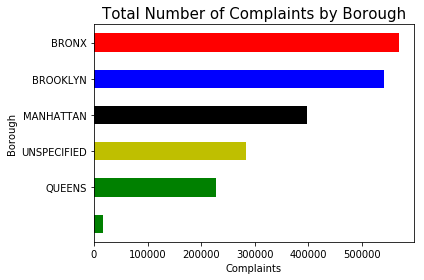

In [183]:
borough_complains_df['borough'] = [u'QUEENS', u'UNSPECIFIED', u'MANHATTAN', u'BROOKLYN', u'BRONX',u'STATEN ISLAND']
colors = ['g','g','y','k','b','r']
borough_complains_df.sort_values(by='unique_key', ascending=True)['unique_key'].plot.barh(color=colors)
plt.xlabel('Complaints')
plt.ylabel('Borough')
plt.title('Total Number of Complaints by Borough', size=15)
plt.yticks(range(1,6),borough_complains_df['borough'])
plt.tight_layout()
plt.show()


## Intermediate conclusion: <br>From the count of Heat / Water complaints per borough we can conclude that:
### BRONX has the highest number of complaints with [568,685]

Let's visualize the Bronx with "RED" color...

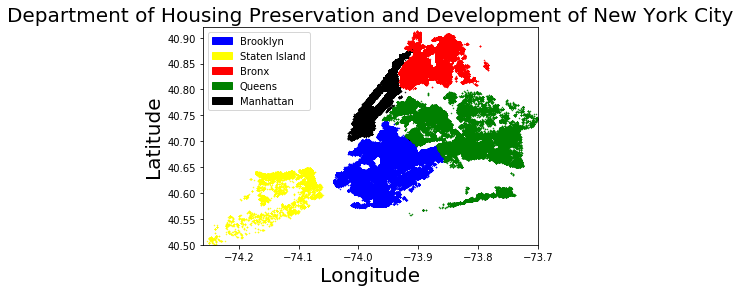

<Figure size 1080x720 with 0 Axes>

In [61]:
manhattan = df_311_heat_hot[df_311_heat_hot['borough']=='MANHATTAN']
bronx = df_311_heat_hot[df_311_heat_hot['borough']=='BRONX']
brooklyn = df_311_heat_hot[df_311_heat_hot['borough']=='BROOKLYN']
staten = df_311_heat_hot[df_311_heat_hot['borough']=='STATEN ISLAND']
queens = df_311_heat_hot[df_311_heat_hot['borough']=='QUEENS']

#create scatterplots
plt.scatter(manhattan.longitude, manhattan.latitude, s=1, color='black', marker ='.')
plt.scatter(bronx.longitude, bronx.latitude, s=1, color='red', marker ='.')
plt.scatter(brooklyn.longitude, brooklyn.latitude, color='blue', s=1, marker ='.')
plt.scatter(staten.longitude, staten.latitude, s=1, color='yellow', marker ='.')
plt.scatter(queens.longitude, queens.latitude, s=1, color='green', marker ='.')

#create legend
black_patch = mpatches.Patch(color='black', label='Manhattan')
red_patch = mpatches.Patch(color='red', label='Bronx')
blue_patch = mpatches.Patch(label='Brooklyn', color='blue')
yellow_patch = mpatches.Patch(color='yellow', label='Staten Island')
green_patch = mpatches.Patch(color='green', label='Queens')

plt.legend([blue_patch, yellow_patch, red_patch, green_patch, black_patch],
           ('Brooklyn', 'Staten Island', 'Bronx', 'Queens', 'Manhattan'), 
           loc='upper left', prop={'size':10})

#adjust more settings
plt.title('Department of Housing Preservation and Development of New York City', size=20)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.figure(figsize=(15,10))
plt.show()



# # ... continue with the question:
##          ... Should The Department of Housing Preservation and Development of New York City focus on any particular set of:
### <center><b>Zip Codes</b></center> 

In [73]:
#df_311_heat_hot = df_311.loc[df_311['complaint_type'] == 'HEAT/HOT WATER']
df_311_heat_bronx = df_311_heat_hot.loc[ df_311_heat_hot['borough'] == 'BRONX']

#Sampling to confirm we have BRONX + HEAT/HOT WATER data
df_311_heat_bronx.head(10)

,Unnamed: 0,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
5,5,2019-03-23T20:16:25.000,42034451,HEAT/HOT WATER,10467.0,3280 ROCHAMBEAU AVENUE,ROCHAMBEAU AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.877404,-73.880713,2019-03-27T10:05:45.000,RESIDENTIAL BUILDING,Closed
7,7,2019-03-23T07:28:26.000,42034902,HEAT/HOT WATER,10460.0,921 EAST 180 STREET,EAST 180 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.844498,-73.881473,2019-03-27T02:08:00.000,RESIDENTIAL BUILDING,Closed
8,8,2019-03-23T05:43:39.000,42034938,HEAT/HOT WATER,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537,2019-03-27T02:06:16.000,RESIDENTIAL BUILDING,Closed
9,9,2019-03-23T05:51:53.000,42034942,HEAT/HOT WATER,10462.0,2074 WALLACE AVENUE,WALLACE AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.852670,-73.864860,2019-03-27T02:07:56.000,RESIDENTIAL BUILDING,Closed
10,10,2019-03-23T06:32:52.000,42034948,HEAT/HOT WATER,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537,2019-03-27T02:06:16.000,RESIDENTIAL BUILDING,Closed
15,15,2019-03-23T00:51:57.000,42035011,HEAT/HOT WATER,10462.0,1700 METROPOLITAN AVENUE,METROPOLITAN AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.840586,-73.854331,2019-03-27T02:06:16.000,RESIDENTIAL BUILDING,Closed
17,17,2019-03-23T19:09:05.000,42035091,HEAT/HOT WATER,10467.0,776 MACE AVENUE,MACE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.863151,-73.864339,2019-03-27T02:07:50.000,RESIDENTIAL BUILDING,Closed
18,18,2019-03-23T18:45:26.000,42035110,HEAT/HOT WATER,10467.0,776 MACE AVENUE,MACE AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.863151,-73.864339,2019-03-27T02:07:50.000,RESIDENTIAL BUILDING,Closed
25,25,2019-03-23T08:52:37.000,42035571,HEAT/HOT WATER,10472.0,1145 MORRISON AVENUE,MORRISON AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.827819,-73.874182,2019-03-27T02:06:17.000,RESIDENTIAL BUILDING,Closed
26,26,2019-03-23T10:06:33.000,42035583,HEAT/HOT WATER,10462.0,2074 WALLACE AVENUE,WALLACE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.852670,-73.864860,2019-03-27T02:07:56.000,RESIDENTIAL BUILDING,Closed


Checking that all values correspond to "BRONX" borough

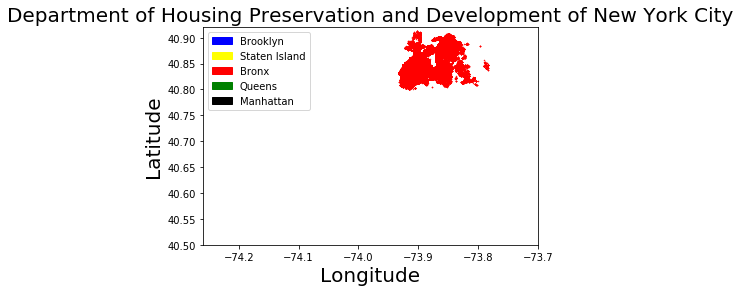

<Figure size 1080x720 with 0 Axes>

In [75]:
manhattan = df_311_heat_bronx[df_311_heat_bronx['borough']=='MANHATTAN']
bronx = df_311_heat_bronx[df_311_heat_bronx['borough']=='BRONX']
brooklyn = df_311_heat_bronx[df_311_heat_bronx['borough']=='BROOKLYN']
staten = df_311_heat_bronx[df_311_heat_bronx['borough']=='STATEN ISLAND']
queens = df_311_heat_bronx[df_311_heat_bronx['borough']=='QUEENS']

#create scatterplots
plt.scatter(manhattan.longitude, manhattan.latitude, s=1, color='black', marker ='.')
plt.scatter(bronx.longitude, bronx.latitude, s=1, color='red', marker ='.')
plt.scatter(brooklyn.longitude, brooklyn.latitude, color='blue', s=1, marker ='.')
plt.scatter(staten.longitude, staten.latitude, s=1, color='yellow', marker ='.')
plt.scatter(queens.longitude, queens.latitude, s=1, color='green', marker ='.')

#create legend
black_patch = mpatches.Patch(color='black', label='Manhattan')
red_patch = mpatches.Patch(color='red', label='Bronx')
blue_patch = mpatches.Patch(label='Brooklyn', color='blue')
yellow_patch = mpatches.Patch(color='yellow', label='Staten Island')
green_patch = mpatches.Patch(color='green', label='Queens')

plt.legend([blue_patch, yellow_patch, red_patch, green_patch, black_patch],
           ('Brooklyn', 'Staten Island', 'Bronx', 'Queens', 'Manhattan'), 
           loc='upper left', prop={'size':10})

#adjust more settings
plt.title('Department of Housing Preservation and Development of New York City', size=20)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.figure(figsize=(15,10))
plt.show()

### Confirmed, all zips correspond to "Bronx" borough, let's see the zipcodes with more complaints

<li> Count complaints per zipcode
<li> Get the top <b>5</b> zipcodes with more complaints

In [148]:
#Count complaints per zipcode
df_borough_zipcodes = pd.DataFrame(df_311_heat_bronx.groupby('incident_zip')['unique_key'].count())

df_top_borough_zipcodes = df_borough_zipcodes.sort_values(by='unique_key', ascending=False).head(5)

df_top_borough_zipcodes

,unique_key
incident_zip,
10458.0,53755
10467.0,53755
10468.0,47394
10453.0,46914
10452.0,40857


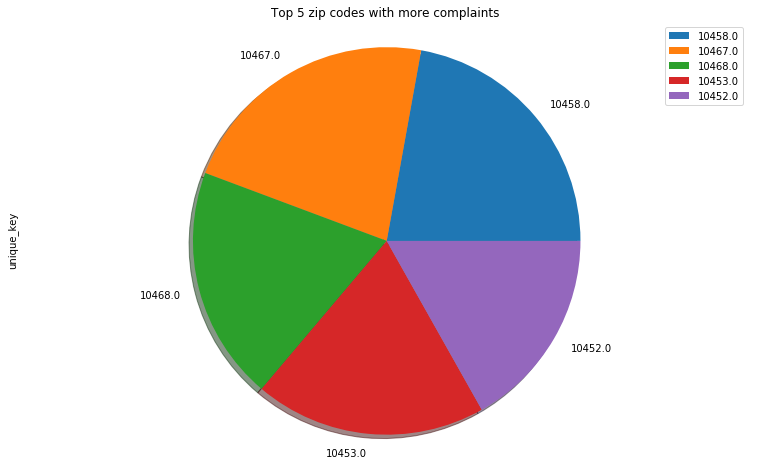

In [149]:
df_top_borough_zipcodes.head(5).plot(kind='pie',
                            figsize=(13, 8),
                            startangle=0,          # start angle 0° 
                            shadow=True,        # add shadow      
                            subplots=True)

plt.title('Top 5 zip codes with more complaints')
plt.axis('equal') 
plt.show()

# Intermmediate conclusion:
## The top 5 zipcodes to focus are:  
10458 with [53,755] complaints<br>
10467 with [53,755] complaints<br>
10468 with [47,394] complaints<br>
10453 with [46,914] complaints<br>
10452 with [40,857] complaints<br>

# ... continue with the question:
##          ... Should The Department of Housing Preservation and Development of New York City focus on any particular set of:
### <center><b>Streets</b></center>  

Get complaints from top <b> 5 </b> zip codes

In [150]:
array_top_zipcodes = {'10458.0', '10467.0', '10468.0', '10453.0', '10452'}
df_filtered_zipcodes = df_311_heat_bronx.loc[(df_311_heat_bronx['incident_zip'].isin(array_top_zipcodes))]
df_filtered_zipcodes


,Unnamed: 0,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
5,5,2019-03-23T20:16:25.000,42034451,HEAT/HOT WATER,10467.0,3280 ROCHAMBEAU AVENUE,ROCHAMBEAU AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.877404,-73.880713,2019-03-27T10:05:45.000,RESIDENTIAL BUILDING,Closed
17,17,2019-03-23T19:09:05.000,42035091,HEAT/HOT WATER,10467.0,776 MACE AVENUE,MACE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.863151,-73.864339,2019-03-27T02:07:50.000,RESIDENTIAL BUILDING,Closed
18,18,2019-03-23T18:45:26.000,42035110,HEAT/HOT WATER,10467.0,776 MACE AVENUE,MACE AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.863151,-73.864339,2019-03-27T02:07:50.000,RESIDENTIAL BUILDING,Closed
59,59,2019-03-23T21:24:28.000,42037024,HEAT/HOT WATER,10467.0,3340 DECATUR AVENUE,DECATUR AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.877516,-73.872938,2019-03-27T02:07:31.000,RESIDENTIAL BUILDING,Closed
101,101,2019-03-24T20:12:15.000,42039184,HEAT/HOT WATER,10458.0,2760 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.868369,-73.892614,2019-03-27T02:07:32.000,RESIDENTIAL BUILDING,Closed
122,122,2019-03-24T16:15:36.000,42040744,HEAT/HOT WATER,10452.0,1240 WOODYCREST AVENUE,WOODYCREST AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.837708,-73.924075,2019-03-27T02:07:47.000,RESIDENTIAL BUILDING,Closed
124,124,2019-03-24T10:28:37.000,42040790,HEAT/HOT WATER,10468.0,3106 VILLA AVENUE,VILLA AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.874589,-73.887765,2019-03-27T10:05:47.000,RESIDENTIAL BUILDING,Closed
131,131,2019-03-24T10:11:09.000,42041464,HEAT/HOT WATER,10458.0,685 EAST 183 STREET,EAST 183 STREET,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.852177,-73.886130,2019-03-27T02:08:00.000,RESIDENTIAL BUILDING,Closed
136,136,2019-03-24T13:56:09.000,42041529,HEAT/HOT WATER,10453.0,1861 SEDGWICK AVENUE,SEDGWICK AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.853615,-73.917854,2019-03-27T02:05:38.000,RESIDENTIAL BUILDING,Closed
164,164,2019-03-24T02:26:45.000,42043673,HEAT/HOT WATER,10453.0,2170 WALTON AVENUE,WALTON AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.856055,-73.904194,2019-03-27T09:01:33.000,RESIDENTIAL BUILDING,Closed


Let's visualize complaints per zip code in the map

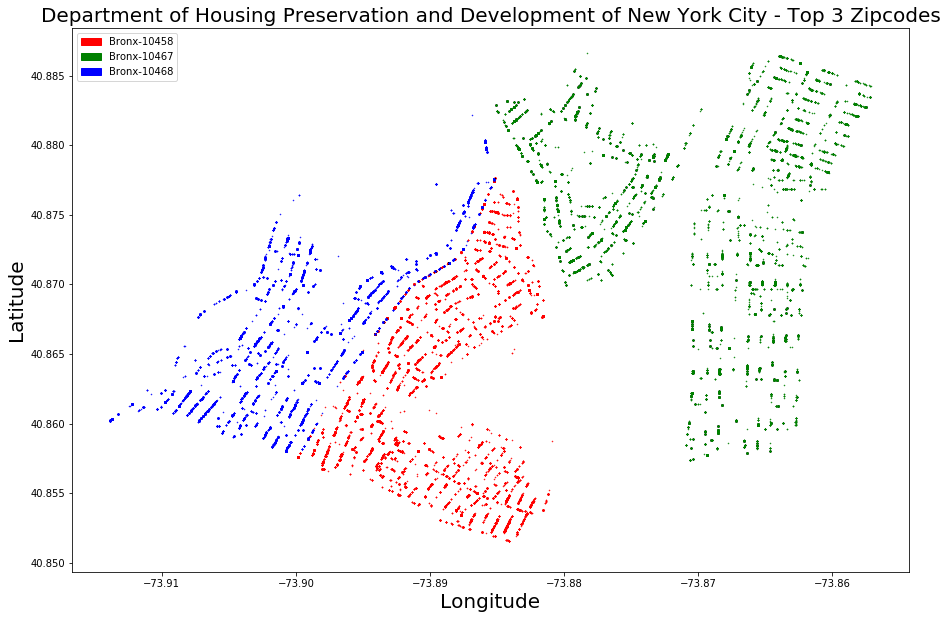

In [157]:
plt.figure(figsize=(15,10))
top_1_zipcode = df_filtered_zipcodes[df_filtered_zipcodes['incident_zip']==10458.0]
top_2_zipcode = df_filtered_zipcodes[df_filtered_zipcodes['incident_zip']==10467.0]
top_3_zipcode = df_filtered_zipcodes[df_filtered_zipcodes['incident_zip']==10468.0]

#create scatterplots
plt.scatter(top_1_zipcode.longitude, top_1_zipcode.latitude, s=1, color='red', marker ='.')
plt.scatter(top_2_zipcode.longitude, top_2_zipcode.latitude, s=1, color='green', marker ='.')
plt.scatter(top_3_zipcode.longitude, top_3_zipcode.latitude, s=1, color='blue', marker ='.')

#create legend
red_patch = mpatches.Patch(color='red', label='Bronx-10458')
green_patch = mpatches.Patch(color='green', label='Bronx-10467')
blue_patch = mpatches.Patch(color='blue', label='Bronx-10468')

plt.legend([red_patch, green_patch, blue_patch],
           ('Bronx-10458', 'Bronx-10467', 'Bronx-10468'), 
           loc='upper left', prop={'size':10})

#adjust more settings
plt.title('Department of Housing Preservation and Development of New York City - Top 3 Zipcodes', size=20)
#plt.xlim((-74.26,-73.7))
#plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()

### Let's find the streets in those zipcodes 

In [163]:
#df_filtered_zipcodes

df_top_streets_count = pd.DataFrame(df_filtered_zipcodes.groupby('street_name')['unique_key'].count())
df_top_streets = df_top_streets_count.sort_values(by='unique_key', ascending=False).head(5)

df_top_streets

,unique_key
street_name,
GRAND CONCOURSE,17668
MORRIS AVENUE,9876
DR M L KING JR BOULEVARD,8583
DECATUR AVENUE,8007
CRESTON AVENUE,7234


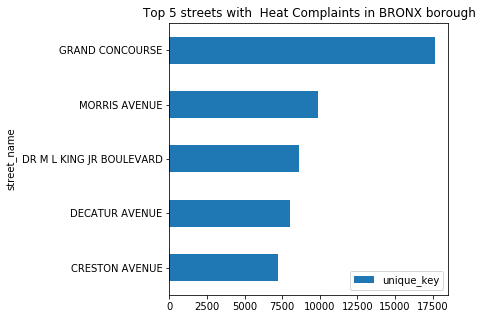

In [164]:
df_top_streets.head(5).plot(kind="barh", figsize=(5,5))
plt.title("Top 5 streets with  Heat Complaints in BRONX borough")
plt.gca().invert_yaxis()

## Intermmediate conclusion:
## The top 3 Streets with more complaints in the "Bronx" borough are: <br>
<li>Grand Concourse</li>
<li>Morris Avenue</li>
<li>Dr M L King JR Boulevard</li>

# Additional Insights.  Is there a property with a bigger number?

### Look for properties within GRAND CONCOURSE street with more number of complaints

In [175]:
df_filtered_street = df_filtered_zipcodes.loc[(df_filtered_zipcodes['street_name']== 'GRAND CONCOURSE')]


df_top_properties_count = pd.DataFrame(df_filtered_street.groupby('incident_address')['unique_key'].count())
df_top_properties = df_top_properties_count.sort_values(by='unique_key', ascending=False).head(5)

df_top_properties

,unique_key
incident_address,
2955 GRAND CONCOURSE,1102
2625 GRAND CONCOURSE,1089
2664 GRAND CONCOURSE,929
1555 GRAND CONCOURSE,894
1749 GRAND CONCOURSE,609


# Final Conclussions

The Department of housing should focus on the <b>"Bronx"</b> borough as we concluded based on the numbers of complaints with <b>568,685 </b>complaints.

From ths borough, I was able to  drill down to the top 3 zip codes:<br>
<b>10458</b> with [53,755] complaints<br>
10467 with [53,755] complaints<br>
10468 with [47,394] complaints<br>

When using the zip code 10468, we were able to conclude the street name with more complaints is: <b>GRAND CONCOURSE</b> in addition to Morris Avenue and Dr M L King JR Boulevard.

<p>
    An addtional finding was on the property <b>2955 GRAND CONCOURSE</b> which holds the bigguest number of complaints.  A street level map could be created using tools like Google Maps to identify the type of property for this address.  There is a high probability that this is a residential building.   PLUTO database could also help to get some more details like year of construction, etc. 
</p>